In [3]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

# 1. Prepare the data:

In [4]:
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

# Number of samples.
N = data.shape[0] 

# Get the matrix input X and the vector label y.
X = data[:,:3]
y = data[:,3:]

# Normalize input X.
maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X-avg) / (maxi-mini)

# Add column vetor 1 into X (for bias).
X_b = np.c_[np.ones((N, 1)), X]

In [5]:
print(f'X_b (with shape = {X_b.shape} =\n{X_b}')

X_b (with shape = (200, 4) =
[[ 1.00000000e+00  5.50426788e-01 -9.83586370e-02  7.57928475e-03]
 [ 1.00000000e+00 -7.57540486e-02 -9.32979082e-02 -7.37297571e-02]
 [ 1.00000000e+00 -1.67859312e-01 -7.10307018e-02  7.91666667e-03]
 [ 1.00000000e+00  2.85244602e-01 -8.65502699e-02 -2.85205803e-02]
 [ 1.00000000e+00  3.84097503e-01 -1.89451754e-01 -2.88579622e-02]
 [ 1.00000000e+00 -1.96536775e-01 -6.09092443e-02  2.71474359e-02]
 [ 1.00000000e+00 -3.18943995e-02 -1.15227733e-01 -1.46604251e-01]
 [ 1.00000000e+00  1.79644062e-01 -1.59762146e-01 -1.86752699e-01]
 [ 1.00000000e+00 -1.96874157e-01 -2.18803981e-01 -2.22515182e-01]
 [ 1.00000000e+00  4.48200067e-01 -2.17117072e-01 -1.54364035e-01]
 [ 1.00000000e+00 -2.87955466e-03 -2.06320850e-01 -1.44242578e-01]
 [ 1.00000000e+00  4.98469973e-01 -1.44917341e-01 -2.12393725e-01]
 [ 1.00000000e+00 -1.45592105e-01 -1.07467949e-01 -3.55431849e-03]
 [ 1.00000000e+00  1.03058367e-01 -2.00247976e-01 -2.01597503e-01]
 [ 1.00000000e+00  4.62707490e-01

In [6]:
print(f'y (with shape = {y.shape} =\n{y}')

y (with shape = (200, 1) =
[[22.1]
 [10.4]
 [12. ]
 [16.5]
 [17.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [15.6]
 [12.6]
 [17.4]
 [ 9.2]
 [13.7]
 [19. ]
 [22.4]
 [12.5]
 [24.4]
 [11.3]
 [14.6]
 [18. ]
 [17.5]
 [ 5.6]
 [20.5]
 [ 9.7]
 [17. ]
 [15. ]
 [20.9]
 [18.9]
 [10.5]
 [21.4]
 [11.9]
 [13.2]
 [17.4]
 [11.9]
 [17.8]
 [25.4]
 [14.7]
 [10.1]
 [21.5]
 [16.6]
 [17.1]
 [20.7]
 [17.9]
 [ 8.5]
 [16.1]
 [10.6]
 [23.2]
 [19.8]
 [ 9.7]
 [16.4]
 [10.7]
 [22.6]
 [21.2]
 [20.2]
 [23.7]
 [ 5.5]
 [13.2]
 [23.8]
 [18.4]
 [ 8.1]
 [24.2]
 [20.7]
 [14. ]
 [16. ]
 [11.3]
 [11. ]
 [13.4]
 [18.9]
 [22.3]
 [18.3]
 [12.4]
 [ 8.8]
 [11. ]
 [17. ]
 [ 8.7]
 [ 6.9]
 [14.2]
 [ 5.3]
 [11. ]
 [11.8]
 [17.3]
 [11.3]
 [13.6]
 [21.7]
 [20.2]
 [12. ]
 [16. ]
 [12.9]
 [16.7]
 [14. ]
 [ 7.3]
 [19.4]
 [22.2]
 [11.5]
 [16.9]
 [16.7]
 [20.5]
 [25.4]
 [17.2]
 [16.7]
 [23.8]
 [19.8]
 [19.7]
 [20.7]
 [15. ]
 [ 7.2]
 [12. ]
 [ 5.3]
 [19.8]
 [18.4]
 [21.8]
 [17.1]
 [20.9]
 [14.6]
 [12.6]
 [12.2]
 [ 9.4]
 [15.9]
 [ 6.6]
 [15.5]
 [ 7.

# 2. Implementation of Stochastic Gradient Descent:

In [7]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01):
    losses = []

    # Initialize w and b
    # Vector theta = [b, w_1, w_2, w_3]^T (shape = 4x1)
    thetas_path = np.random.randn(X_b.shape[1], 1)/100

    for _ in range(n_epochs):
        # Shuffling samples
        shuffle_index = np.random.permutation(N)
        X_b_shuffle = X_b[shuffle_index]
        y_shuffle = y[shuffle_index]

        for i in range(N):
            # 1. Prepare sample:
            x_i = X_b_shuffle[i : i+1]
            y_i = y_shuffle[i : i+1]

            # 2. Compute output y_hat:
            y_hat_i = x_i.dot(thetas_path)

            # 3. Compute Loss:
            loss = (y_hat_i - y_i)**2
            losses.append(loss.flatten())

            # 4. Compute partial derivatives:
            loss_derivative = (x_i.T) * 2 * (y_hat_i - y_i)

            # 5. Update vector theta by Gradient Descent:
            thetas_path -= learning_rate * loss_derivative
    
    return thetas_path, losses

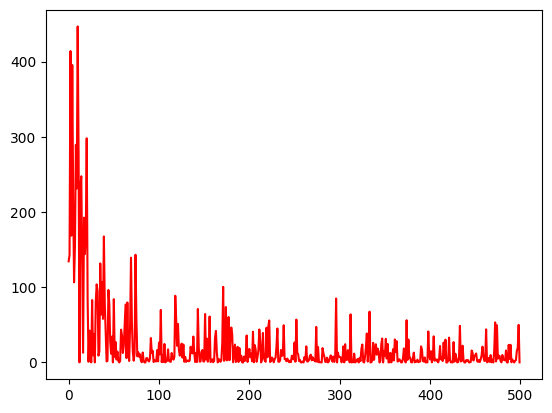

In [8]:
bgd_thetas, losses = stochastic_gradient_descent(X_b=X_b, y=y, n_epochs=50, learning_rate=0.01)

# in loss cho 500 sample đầu
x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color="r")
plt.show()

# 2. Implemetation of Mini-Batch Gradient Descent:

In [9]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    losses = []

    # Initialize w and b
    # Vector theta = [b, w_1, w_2, w_3]^T (shape = 4x1)
    thetas_path = np.random.randn(X_b.shape[1], 1)/100

    for _ in range(n_epochs):
        # Calculate number of iterations
        num_of_ite = N // minibatch_size
        
        # Shuffling samples
        shuffle_index = np.random.permutation(N)
        X_b_shuffle = X_b[shuffle_index]
        y_shuffle = y[shuffle_index]

        for i in range(num_of_ite):
            # 1. Prepare sample:
            x_i = X_b_shuffle[i : i + minibatch_size]
            y_i = y_shuffle[i : i + minibatch_size]

            # 2. Compute output y_hat:
            y_hat_i = x_i.dot(thetas_path)

            # 3. Compute Loss:
            loss = (y_hat_i - y_i)**2
            losses.append(np.mean(loss))

            # 4. Compute partial derivatives:
            loss_derivative = (x_i.T).dot(2*(y_hat_i - y_i))

            # 5. Update vector theta by Gradient Descent:
            thetas_path -= learning_rate * loss_derivative / minibatch_size
    
    return thetas_path, losses

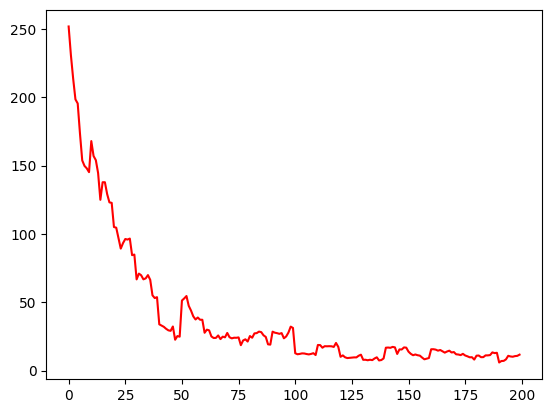

In [10]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b=X_b, y=y, n_epochs=50, minibatch_size=20, learning_rate=0.01)

# in loss cho 100 sample đầu
x_axis = list(range(200))
plt.plot(x_axis,losses[:200], color="r")
plt.show()